# NetworkX Graphs
# 2. Adjacency

[1. Neighbors](#1)

[2. Neighbors in Isomorphic Graphs](#2)

[3. Degrees](#3)

[4. Degree Histograms](#4)

[5. Adjacency Matrices](#5)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random
import math
import numpy as np
import scipy as sp
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
from pylab import hist
from IPython.display import Image
from IPython.core.display import HTML 
from netwulf import visualize

<a id='1'></a>
## 1. Neighbors

### 1.1 Undirected Graphs

**Given an undirected graph *G = (V,E)* (where *V* denotes the set of vertices and *E* the set of edges of *G*) and a vertex *u ∈ V*, another vertex *v ∈ V* is a *neighbor* of *u* if there is an edge *(u,v) ∈ E*. The subset of *V* composed of all neighbors of node *u* is denoted as *N(u)*. If *N(u)* is empty, node *u* is called *isolated.***

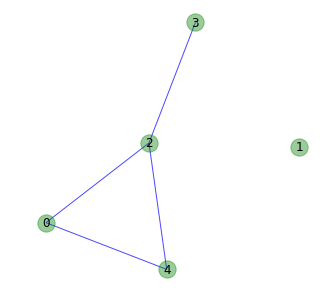

In [2]:
while True:
    G=nx.erdos_renyi_graph(5,0.3)
    if nx.triangles(G,0)==1 and len(list(nx.isolates(G)))==1:
            break

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [3]:
for n in G.nodes():
    nb=list(nx.neighbors(G,n))
    if len(nb)>0:
        print "Node %s has %i neighbors: %s" %(n,len(nb),", ".join(str(e) for e in nb))
    else:
        print "Node %s has %i neighbors: %s is an isolate" %(n,len(nb),n)

Node 0 has 2 neighbors: 2, 4
Node 1 has 0 neighbors: 1 is an isolate
Node 2 has 3 neighbors: 0, 3, 4
Node 3 has 1 neighbors: 2
Node 4 has 2 neighbors: 0, 2


Node 6 has 6 neighbors: 0, 1, 2, 7, 9, 12
Node 5 has 3 neighbors: 10, 12, 7


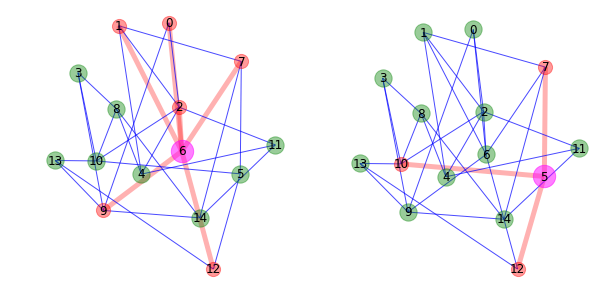

In [4]:
while True:
    G=nx.gnm_random_graph(15,30)
    if nx.is_connected(G)==True and min(dict(nx.degree(G)).values())>2:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.degree(x1)==max(dict(nx.degree(G)).values()):
        break
        
i1=[x1]
nb1=list(nx.neighbors(G,x1))
print "Node %s has %i neighbors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1 or e[1]==x1 and e[0] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.degree(x2)==min(dict(nx.degree(G)).values()):
        break

i2=[x2]
nb2=list(nx.neighbors(G,x2))
print "Node %s has %i neighbors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[0]==x2 and e[1] in i2+nb2 or e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

### 1.2 Directed Graphs

**Given a directed graph *G = (V,E)* and a vertex *u ∈ V*, another vertex *v ∈ V* is called**

- **a *successor* or *out-going neighbor* of *u* if there is an edge *(u,v) ∈ E* and**
- **an *predecessor* or *in-coming neighbor* of *u* if there is an edge *(v,u) ∈ E*.**

**The subset of *V* composed of all successors of node *u* is denoted as *Nout(u)* and the subset of all predecessors as *Nin(u)*. If both *Nout(u)* and *Nin(u)* are empty, *u* is called *isolated.***

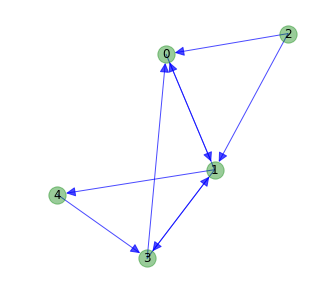

In [5]:
while True:
    G=nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
            break

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [6]:
for n in G.nodes():
    nbout=list(G.successors(n))
    nbin=list(G.predecessors(n))
    if len(nbout)>0:
        print "Node %s has %i successors: %s" %(n,len(nbout),", ".join(str(e) for e in nbout))
    if len(nbin)>0:
        print "Node %s has %i predecessors: %s" %(n,len(nbin),", ".join(str(e) for e in nbin))
    if len(nbout)==0 and len(nbin)==0:
        print "Node %s has %i successors and predecessors: %s is an isolate" %(n,len(nbout)+len(nbin),n)

Node 0 has 1 successors: 1
Node 0 has 3 predecessors: 1, 2, 3
Node 1 has 3 successors: 0, 3, 4
Node 1 has 3 predecessors: 0, 2, 3
Node 2 has 2 successors: 0, 1
Node 3 has 2 successors: 0, 1
Node 3 has 2 predecessors: 1, 4
Node 4 has 1 successors: 3
Node 4 has 1 predecessors: 1


Node 6 has 4 successors: 9, 11, 4, 1
Node 4 has 6 predecessors: 0, 1, 5, 6, 10, 13


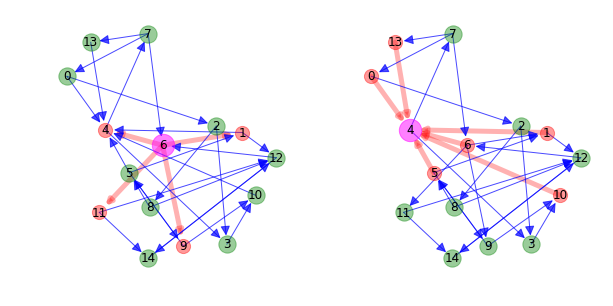

In [7]:
while True:
    G=nx.gnm_random_graph(15,30,directed=True)
    if nx.is_weakly_connected(G)==True and min(dict(G.out_degree()).values())>0 and min(dict(G.in_degree()).values())>0:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.out_degree(x1)==max(dict(G.out_degree()).values()):
        break
        
i1=[x1]
nb1=list(G.successors(x1))
print "Node %s has %i successors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.in_degree(x2)==max(dict(G.in_degree()).values()): #min(dict(G.out_degree()).values()):
        break

i2=[x2]
nb2=list(G.predecessors(x2))
print "Node %s has %i predecessors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

<a id='2'></a>
## 2. Neighbors in Isomorphic Graphs

***Definition*: Two graphs *G = (V(G),E(G))* and *H = (V(H),E(H))* are said to be *isomorphic* if there exists a 1-1 and onto mapping *φ: V(G) → V(H)* such that *φ* maps edges of *G* to edges of *H*, i.e., for any *(u,v) ∈ E(G)*, it happens that *(φ(u),φ(v)) ∈ E(H)*.**

### 2.1 Undirected Graphs

The isomorphism phi maps node 0 of G to node 3 of H
The isomorphism phi maps node 1 of G to node 2 of H
The isomorphism phi maps node 2 of G to node 1 of H
The isomorphism phi maps node 3 of G to node 4 of H
The isomorphism phi maps node 4 of G to node 0 of H


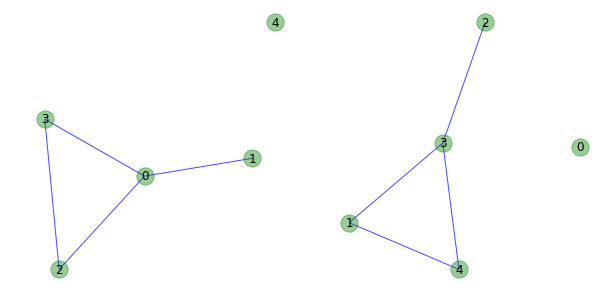

In [8]:
while True:
    G=nx.erdos_renyi_graph(5,0.3)
    if nx.triangles(G,0)==1 and len(list(nx.isolates(G)))==1:
            break
            
while True:
    H = nx.erdos_renyi_graph(5,0.3)
    if nx.is_isomorphic(H,G):
        break
        
GM = nx.algorithms.isomorphism.GraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

### 2.2 Directed Graphs

[(0, 1), (0, 3), (0, 4), (2, 3), (3, 1), (3, 2), (4, 0)]
[(0, 2), (1, 4), (2, 0), (2, 3), (4, 1), (4, 2), (4, 3)]
{0: 4, 1: 3, 2: 0, 3: 2, 4: 1}
The isomorphism phi maps node 0 of G to node 4 of H
The isomorphism phi maps node 1 of G to node 3 of H
The isomorphism phi maps node 2 of G to node 0 of H
The isomorphism phi maps node 3 of G to node 2 of H
The isomorphism phi maps node 4 of G to node 1 of H


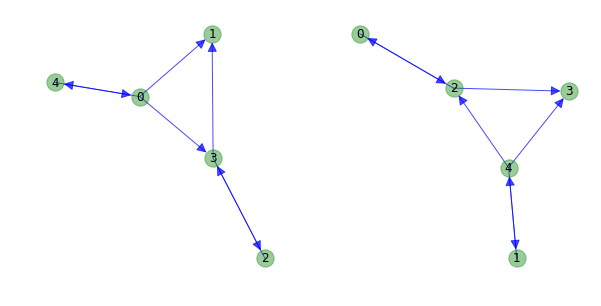

In [9]:
while True:
    G=nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
            break

while True:
    H = nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
        if nx.is_isomorphic(H,G):
            break
        
print G.edges()
print H.edges()
GM = nx.algorithms.isomorphism.DiGraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
print phi
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos,arroesize=20, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

<a id='3'></a>
## 3. Degrees

### 3.1 Undirected Graphs

**The *degree* of a vertex of an undirected graph is equal to the number of neighbors of the vertex.**

In [10]:
G=nx.gnm_random_graph(15,30)

for n in G.nodes():
    print "%s has degree %i" %(n,G.degree(n))

0 has degree 3
1 has degree 7
2 has degree 1
3 has degree 5
4 has degree 4
5 has degree 2
6 has degree 3
7 has degree 4
8 has degree 5
9 has degree 6
10 has degree 6
11 has degree 3
12 has degree 2
13 has degree 5
14 has degree 4


In [11]:
d=dict(G.degree(G.nodes()))
sd = list(sorted(d, key=d.__getitem__, reverse=True))
for i in sd:
    print "%s has degree %i" %(i,d[i])

1 has degree 7
9 has degree 6
10 has degree 6
3 has degree 5
8 has degree 5
13 has degree 5
4 has degree 4
7 has degree 4
14 has degree 4
0 has degree 3
6 has degree 3
11 has degree 3
5 has degree 2
12 has degree 2
2 has degree 1


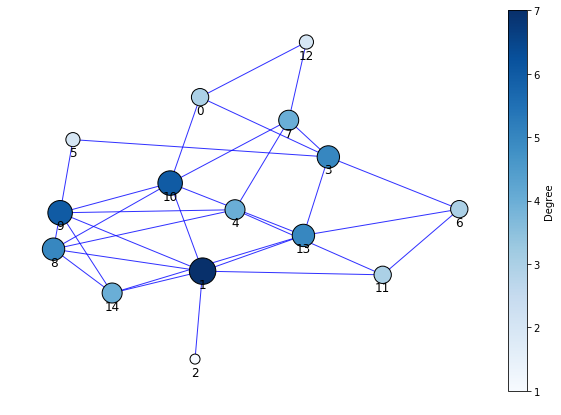

In [12]:
node_color=[G.degree(n) for n in G.nodes()]
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.Blues #plt.cm.coolwarm

node_list=[ G.degree(n) for n in G.nodes() ]
node_size_list=[100*n for n in node_list]

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_size_list, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off =-13 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

### 3.2 Directed Graphs

* **The *out-degree* of a vertex of a directed graph is equal to the number of successors of the vertex.**
* **The *in-degree* of a vertex of a directed graph is equal to the number of predecessors of the vertex.**

In [13]:
G=nx.gnm_random_graph(15,30,directed=True)

for n in G.nodes():
    print "%s has out-degree %i and in-degree %i" %(n,G.out_degree(n),G.in_degree(n))

0 has out-degree 4 and in-degree 1
1 has out-degree 1 and in-degree 2
2 has out-degree 1 and in-degree 4
3 has out-degree 5 and in-degree 0
4 has out-degree 4 and in-degree 1
5 has out-degree 4 and in-degree 3
6 has out-degree 1 and in-degree 1
7 has out-degree 3 and in-degree 1
8 has out-degree 2 and in-degree 2
9 has out-degree 2 and in-degree 2
10 has out-degree 0 and in-degree 2
11 has out-degree 1 and in-degree 3
12 has out-degree 2 and in-degree 2
13 has out-degree 0 and in-degree 2
14 has out-degree 0 and in-degree 4


In [14]:
do=dict(G.out_degree(G.nodes()))
sdo = list(sorted(do, key=do.__getitem__, reverse=True))
for i in sdo:
    print "%s has out-degree %i" %(i,do[i])

3 has out-degree 5
0 has out-degree 4
4 has out-degree 4
5 has out-degree 4
7 has out-degree 3
8 has out-degree 2
9 has out-degree 2
12 has out-degree 2
1 has out-degree 1
2 has out-degree 1
6 has out-degree 1
11 has out-degree 1
10 has out-degree 0
13 has out-degree 0
14 has out-degree 0


In [15]:
di=dict(G.in_degree(G.nodes()))
sdi = list(sorted(di, key=di.__getitem__, reverse=True))
for i in sdi:
    print "%s has in-degree %i" %(i,di[i])

2 has in-degree 4
14 has in-degree 4
5 has in-degree 3
11 has in-degree 3
1 has in-degree 2
8 has in-degree 2
9 has in-degree 2
10 has in-degree 2
12 has in-degree 2
13 has in-degree 2
0 has in-degree 1
4 has in-degree 1
6 has in-degree 1
7 has in-degree 1
3 has in-degree 0


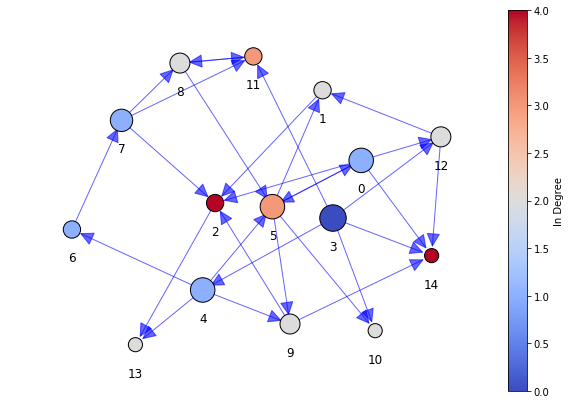

In [16]:
node_color=[G.in_degree(n) for n in G.nodes()]
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.coolwarm #plt.cm.Blues #

node_list=[ G.out_degree(n) for n in G.nodes() ]
node_size_list=[100*(2+n) for n in node_list] #math.log

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_size_list, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,arrowsize=30,edge_color='b',alpha=0.6)
plt.axis('off');
yoffset = {}
y_off =-17 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='In Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

<a id='4'></a>
## 4. Degree Histograms

Three ways to plot histograms:
* With "from pylab import hist" and "hist"
* With "ax = plt.subplot(111)" and "ax.hist"
* With pandas "pandas.DataFrame.hist" (not now)

### 4.1 Undirected Graphs

Degree sequence:
[5, 5, 4, 2, 6, 3, 1, 4, 4, 4, 3, 2, 5, 5, 6, 3, 6, 5, 3, 4]
Counter({4: 5, 5: 5, 3: 4, 6: 3, 2: 2, 1: 1}) 1 6


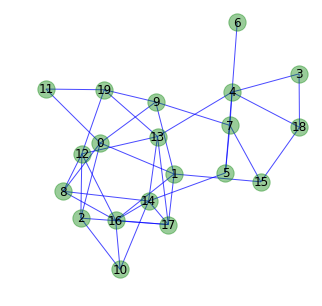

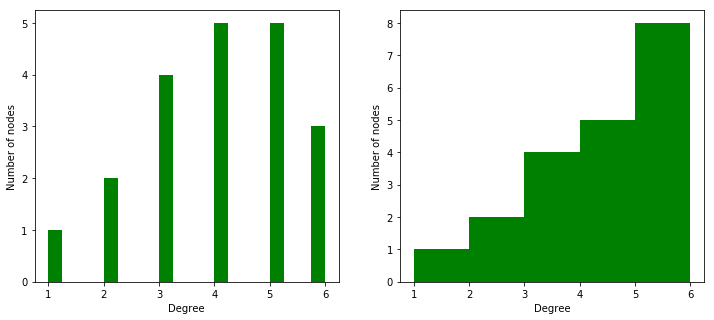

In [17]:
G=nx.gnm_random_graph(20,40)

ds=dict(G.degree(G.nodes())).values()
print "Degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

In [18]:
# plt.figure(figsize=(6,5));
# ax = plt.subplot(111);
# bins=len(ds)
# plt.xlabel("Degree");
# ax.hist(ds,bins=bins,color='g'); 
# # histtype='step',
# plt.ylabel("Number of nodes");

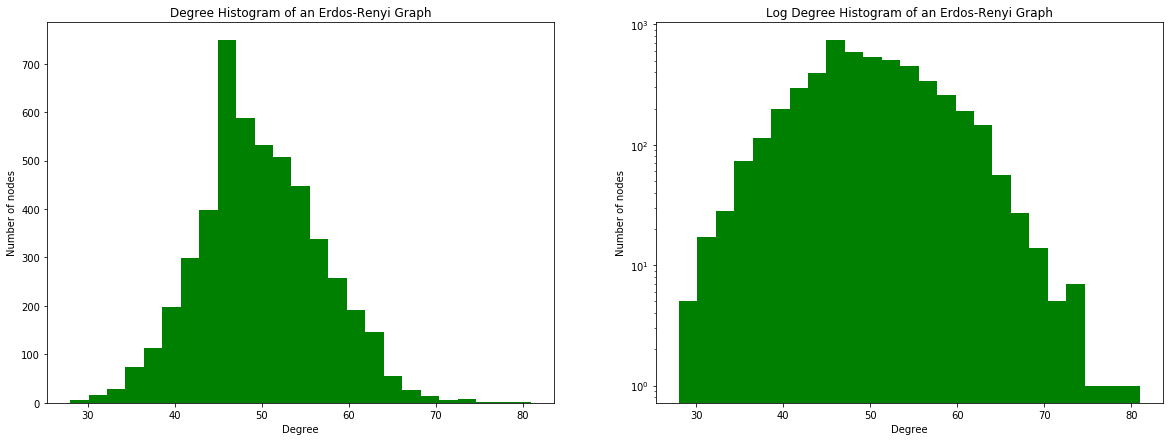

In [19]:
G = nx.erdos_renyi_graph(5000,0.01)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of an Erdos-Renyi Graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Log Degree Histogram of an Erdos-Renyi Graph');

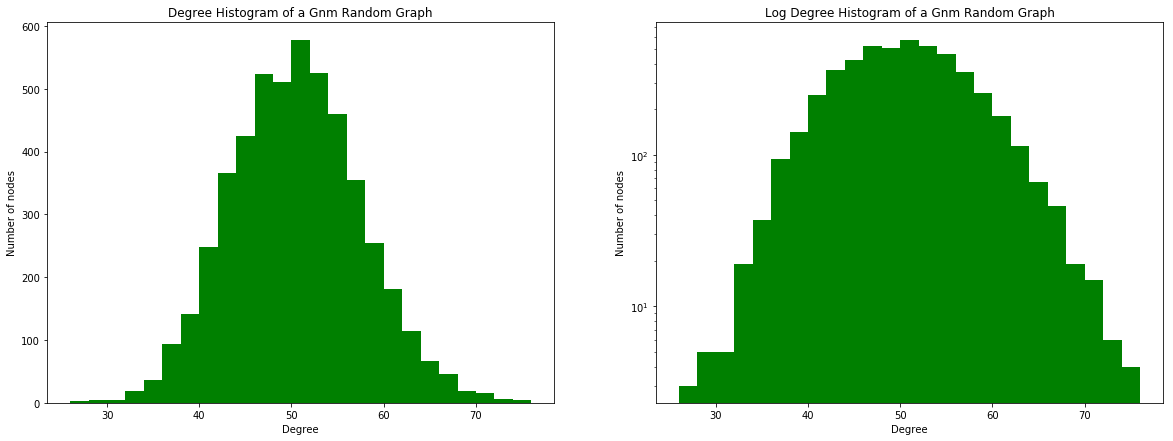

In [20]:
G = nx.gnm_random_graph(5000,125000)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of a Gnm Random Graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Log Degree Histogram of a Gnm Random Graph');

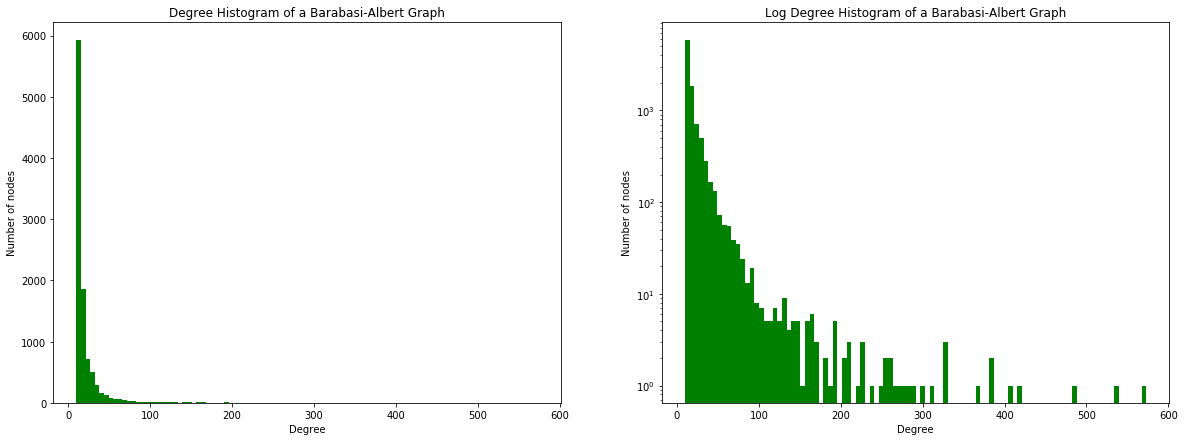

In [21]:
G = nx.barabasi_albert_graph(10000,10)

ds=dict(G.degree(G.nodes())).values()
bins=100

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of a Barabasi-Albert Graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Log Degree Histogram of a Barabasi-Albert Graph');

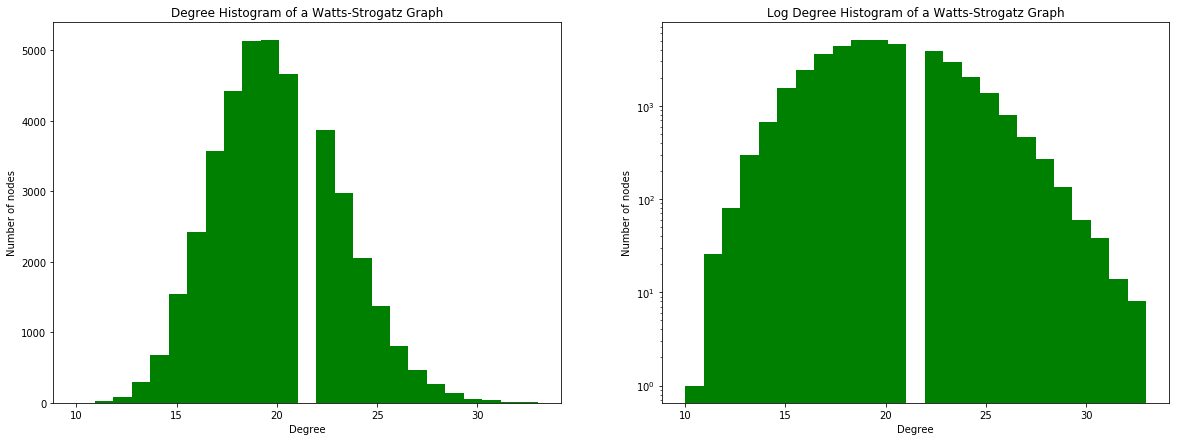

In [22]:
G = nx.watts_strogatz_graph(40000,20,0.8)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of a Watts-Strogatz Graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Log Degree Histogram of a Watts-Strogatz Graph');

### 4.2 Directed Graphs

#### Out-Degree Histograms

Out-degree sequence:
[3, 5, 2, 2, 4, 1, 3, 3, 2, 1, 3, 3, 3, 5, 2, 4, 2, 4, 2, 4, 3, 3, 2, 2, 2]
Counter({2: 9, 3: 8, 4: 4, 1: 2, 5: 2}) 1 5


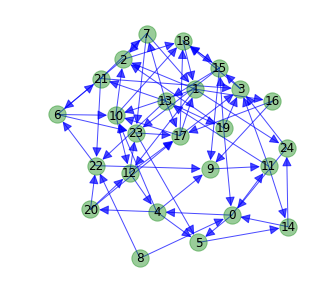

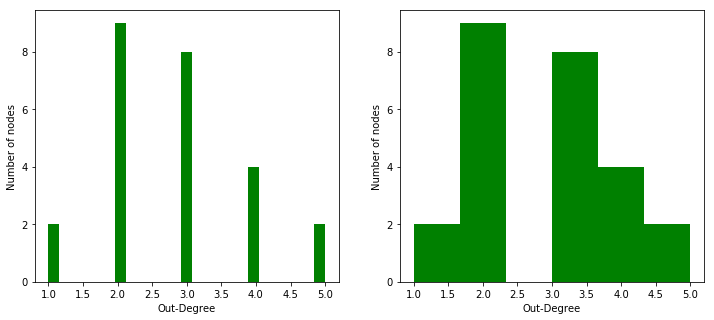

In [23]:
G=nx.gnm_random_graph(25,70,directed=True )

ds=dict(G.out_degree(G.nodes())).values()
print "Out-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

#### In-Degree Histograms

In-degree sequence:
[4, 3, 4, 5, 2, 3, 2, 2, 0, 4, 4, 2, 3, 2, 2, 3, 1, 5, 5, 1, 1, 2, 4, 4, 2]
Counter({2: 8, 4: 6, 3: 4, 1: 3, 5: 3, 0: 1}) 0 5


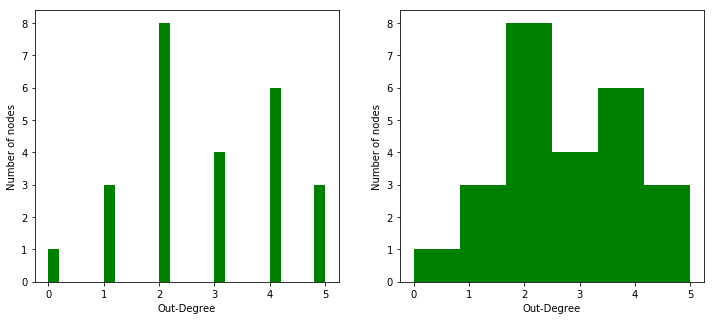

In [24]:
ds=dict(G.in_degree(G.nodes())).values()
print "In-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

<a id='5'></a>
## 5. Adjacency Matrices

**The *adjacency matrix* of a graph *G=(V,E)* with *n* vertices is a matrix *nxn A = {Aij}* such that *Aij = 1*, whenever *(i,j) ∈ E*, while otherwise *Aij = 0*.**
* **If *G* is undirected, *A* is symmetrical. If *G* is directed, *A* can be non-symmetrical.**
* **If *G* is *weighted*, the values of *Aij* are the weights at edges *(i,j)*.**

### 5.1 Undirected Graphs

[[0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0]]


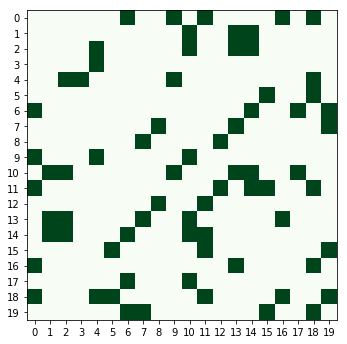

In [25]:
G = nx.erdos_renyi_graph(20,0.2)

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="Greens",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

#### Create undirected graph from a symmetric matrix of 0s and 1s

1.92455883774
False
20 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
57 edges
Is G directed? False


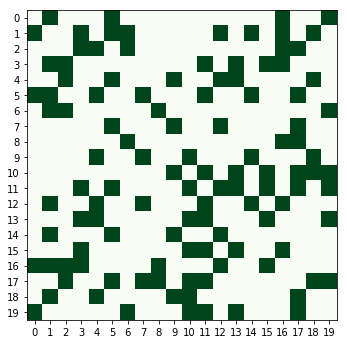

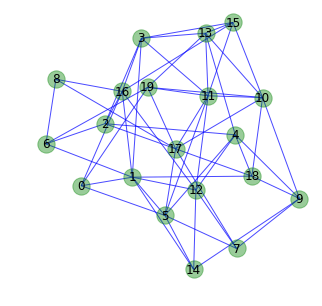

In [26]:
n=20
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
print a
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
# print A
G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="Greens",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### 5.2 Directed Graphs

[[0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0]]


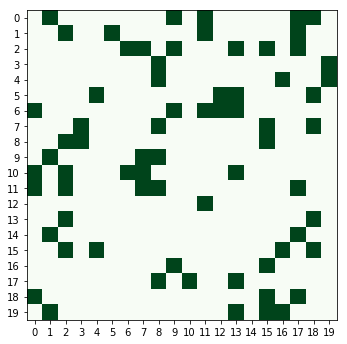

In [27]:
G = nx.erdos_renyi_graph(20,0.2,directed=True)

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="Greens",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

#### Create directed graph from a matrix of 0s and 1s

Is G directed? True
True
20 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
165 edges
Is G directed? True


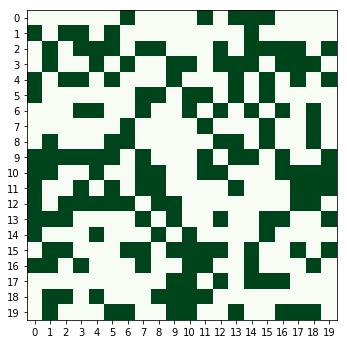

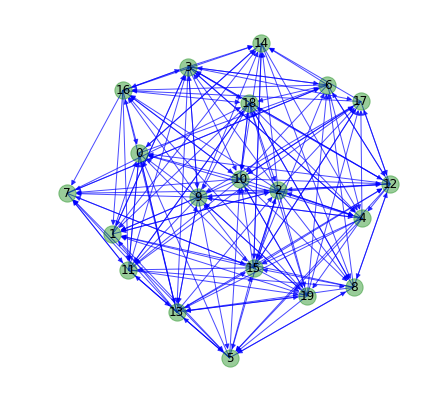

In [28]:
n=20
A1=np.random.random((n,n))
A2=A1-np.diag(np.diag(A1))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
G=nx.from_numpy_matrix(A,create_using=nx.DiGraph())
print "Is G directed?", G.is_directed()
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="Greens",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=10,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### 5.3 Weighted (Undirected) Graphs

[[0 0 0 5 0 0 7 0 0 0 0 0 0 0 0 0 0 1 0 3]
 [0 0 0 0 0 0 9 0 0 9 0 0 0 0 0 0 0 0 0 9]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 5 0 0 8]
 [5 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 2 0 0 6 0]
 [7 9 0 0 0 0 0 0 9 0 0 0 1 5 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 2 2 0]
 [0 0 0 0 0 0 9 7 0 0 0 0 0 7 3 0 1 0 0 0]
 [0 9 0 0 0 0 0 0 0 0 5 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 4 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 5 0 7 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 3 0 2 0 0 0 0 0 1 8 0 0 0 0 0 9 0]
 [0 0 5 0 0 0 0 0 1 4 0 0 0 4 0 0 0 0 0 0]
 [1 0 0 1 0 0 1 2 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 6 0 2 0 0 0 0 0 0 0 9 0 0 0 0]
 [3 9 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


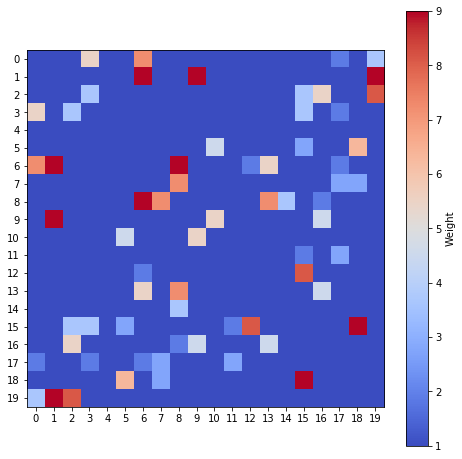

In [29]:
G = nx.erdos_renyi_graph(20,0.2)

weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(8,8))
cmap=plt.cm.coolwarm #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

#### Create weighted graph from a matrix of integers

[[ 0  5 13 15  4 15  5  3 11 12 18  6  8 14  0  9 15  4  5 11]
 [12  0 15  1 14  7 13  0  4  7 16 12 11 14  3 15 11  8  7  9]
 [ 0 13  0  9  3 11  5 12 15 10 11  8  6 10  6  9  0  8 11  5]
 [ 6 18  8  0  1 12  8 11  1  9 13  3  0 14  8 11  7 10 10  9]
 [11 13 11  7  0  9 10 16  6 10  0 16 13  7 18 14 10 10 10  9]
 [ 3  7 15 12  0  0 17 14 10 10 11 17  1 13  4 12  9 13  8  8]
 [ 8 14  5  5 17 13  0 12  9  3 16  0  3  7  6 15  4  5  6  7]
 [ 8  2 11 11 13  4 14  0 10 10 10  5 10 17  4  2 12  0 10  5]
 [11 13 15  4 17  0 13  7  0  8  9 13 12 16 15 10 11  4  6 10]
 [ 5  8 15 11 17 13  0 13 12  0 10 14  8  9  5 16  9 14 16 16]
 [ 9 14  6  1 12 10 16 15  6  5  0 15 11 15  9  0  7  2  7 10]
 [16  9  0  8 15 15 15 15  9 13 11  0  8  9 13  6  6 11  8 17]
 [11  4  8  9  8  6 16  7 11 13 10  6  0  6  5  7  8 10  0  6]
 [10  5 13  8 10  8  7  7 10  0 10  3  9  0 12  5  5 10 13 10]
 [13  0  9  6  7 13  8 11 11  5 13 14 18  9  0 14  6  2  4  9]
 [ 0  6  6  7  9 11  9 11 14  5 10  4  7 13 15  0  0 12

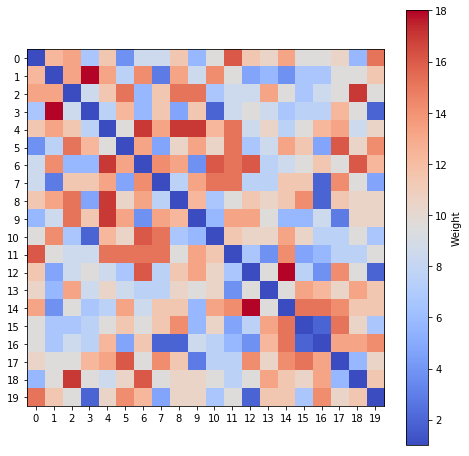

In [30]:
n=20
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
# a=A.max()
# print a
# cut=a-0.5
# A[A > cut] = 1
# A[A != 1] = 0
A=A-np.diag(np.diag(A))
A=10*A
A=A.astype(int)
print A

G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G weighted?", nx.is_weighted(G)

# print G.edges(data=True)
weight_list = [ e[2]['weight'] for e in G.edges(data=True) ]

fig = plt.figure(figsize=(8,8))
cmap=plt.cm.coolwarm #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

# pos=graphviz_layout(G)
# plt.figure(figsize=(5,5));
# nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
# nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
# nx.draw_networkx_labels(G, pos)
# plt.axis('off');